In [57]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [58]:
# Import CSV file of education data
Austin_file = "../Resources/Census.gov/By_Year/Merged_datasets/Austin_census_merged_clean.csv"

pop_csv = pd.read_csv(Austin_file)

Austin_df = pd.DataFrame(pop_csv)
Austin_df.head()

,Zipcode,Education (No Schooling)_2012,Education (High School)_2012,Education (GED)_2012,Education (Associate's)_2012,Education (Bachelor's)_2012,Education (Master's)_2012,Education (Master's)_2012.1,Education (Doctorate)_2012,Education (No Schooling)_2013,...,Female_2017,Poverty White_2018,Poverty Black_2018,Poverty American Indian_2018,Poverty Asian_2018,Poverty Hispanic_2018,Poverty Two or More Races_2018,Total Poverty Count_2018,Poverty Male_2018,Female_2018
0,78610,40,2859,606,1093,3750,1135,112,104,34,...,1466,2081,72,0,0,11,16,2381,1024,1357
1,78613,122,5852,998,3123,13532,3759,781,513,78,...,1589,2984,70,0,244,0,222,3617,1763,1854
2,78617,459,2564,735,503,1089,118,20,0,474,...,2621,1785,316,16,14,0,71,4022,1661,2361
3,78641,328,5425,1430,2635,6670,1942,277,226,405,...,2204,3335,481,0,69,0,109,4027,1873,2154
4,78652,27,685,46,180,1049,247,17,3,25,...,237,554,14,0,0,0,0,568,290,278


### Line chart



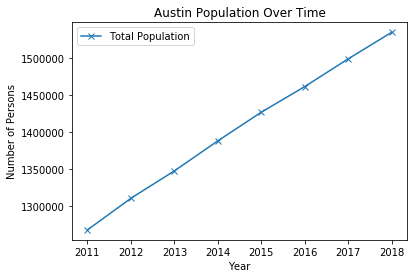

In [3]:
# Populations
populations = [population_df["Population_2011"].sum(), population_df["Population_2012"].sum(), population_df["Population_2013"].sum(), 
               population_df["Population_2014"].sum(), population_df["Population_2015"].sum(), population_df["Population_2016"].sum(),
               population_df["Population_2017"].sum(), population_df["Population_2018"].sum()]

years = ["2011", "2012", "2013", "2014", "2015", "2016", "2017", "2018"]

# Generate line plot
plt.plot(years, populations, marker="x", label="Total Population")
plt.title("Austin Population Over Time")
plt.xlabel("Year")
plt.ylabel("Number of Persons")

plt.legend()

In [4]:
population_df["Population_2011"].sum()

1268143

### Bar graph

<BarContainer object of 8 artists>

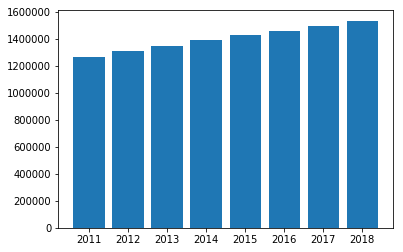

In [5]:


years = ["2011", "2012", "2013", "2014", "2015", "2016", "2017", "2018"]

Total_pop = [population_df["Population_2011"].sum(), population_df["Population_2012"].sum(), population_df["Population_2013"].sum(), 
           population_df["Population_2014"].sum(), population_df["Population_2015"].sum(), population_df["Population_2016"].sum(),
           population_df["Population_2017"].sum(), population_df["Population_2018"].sum()]

white_pop = [population_df["Population (White Alone)_2011"].sum(), population_df["Population (White Alone)_2012"].sum(), population_df["Population (White Alone)_2013"].sum(), 
           population_df["Population (White Alone)_2014"].sum(), population_df["Population (White Alone)_2015"].sum(), population_df["Population (White Alone)_2016"].sum(),
           population_df["Population (White Alone)_2017"].sum(), population_df["Population (White Alone)_2018"].sum()]

black_pop = [population_df["Population (Black Alone)_2011"].sum(), population_df["Population (Black Alone)_2012"].sum(), population_df["Population (Black Alone)_2013"].sum(), 
           population_df["Population (Black Alone)_2014"].sum(), population_df["Population (Black Alone)_2015"].sum(), population_df["Population (Black Alone)_2016"].sum(),
           population_df["Population (Black Alone)_2017"].sum(), population_df["Population (Black Alone)_2018"].sum()]



plt.bar(years, Total_pop, align="center")

In [6]:
black = [population_df["Population (Black Alone)_2011"].sum(), population_df["Population (Black Alone)_2012"].sum(), population_df["Population (Black Alone)_2013"].sum(), 
           population_df["Population (Black Alone)_2014"].sum(), population_df["Population (Black Alone)_2015"].sum(), population_df["Population (Black Alone)_2016"].sum(),
           population_df["Population (Black Alone)_2017"].sum(), population_df["Population (Black Alone)_2018"].sum()]
black

[100904, 104777, 105214, 107619, 110813, 112653, 114470, 118304]

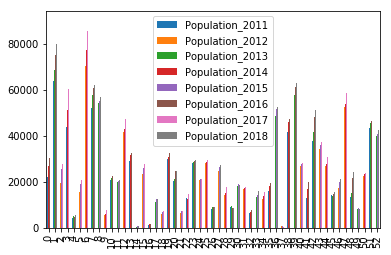

In [59]:
total_df = Austin_df[["Population_2011", "Population_2012", "Population_2013",
                       "Population_2014", "Population_2015", "Population_2016",
                       "Population_2017", "Population_2018"]]

total_df.plot(kind="bar")

In [60]:
total_df = total_df.transpose()

Text(0, 0.5, 'Number of People')

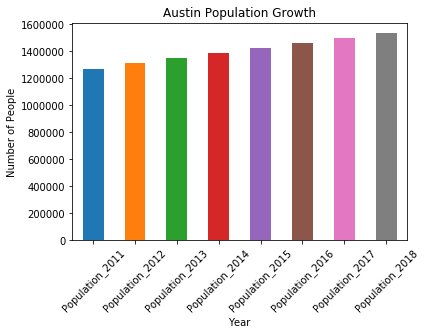

In [61]:
total_df["Sum"] = total_df.sum(axis=1)
Sum = total_df["Sum"]
Sum.plot(kind="bar")

# Set tick locations and names
plt.xticks(rotation=45)

# Set a Title and labels
plt.title("Austin Population Growth")
plt.xlabel("Year")
plt.ylabel("Number of People")

### Population Distribution

In [65]:
# Transpose data
Austin_df = Austin_df.transpose()

In [66]:
# Define function to pull population total for a given year

def pop_year(year):
    # Set year to input
    year = year
    
    # Pull race/ethnic group data for that year
    white_year = Austin_df.loc[f"Population (White Alone)_{year}"].sum()
    black_year = Austin_df.loc[f"Population (Black Alone)_{year}"].sum()
    indian_year = Austin_df.loc[f"Population (American Indian or Alaskan Native Alone)_{year}"].sum()
    asian_year = Austin_df.loc[f"Population (Asian Alone)_{year}"].sum()
    hawaiian_year = Austin_df.loc[f"Population (Native Hawaiian and Other Pacific Islander Alone)_{year}"].sum()
    
    other = indian_year + hawaiian_year
    
    # join to a list
    year_list = [white_year, black_year, asian_year, other]
    
    return year_list

In [67]:
year_list = pop_year(2011)
year_list

[903179.0, 100904.0, 75585.0, 7984.0]

Text(0, 0.5, 'Number of People')

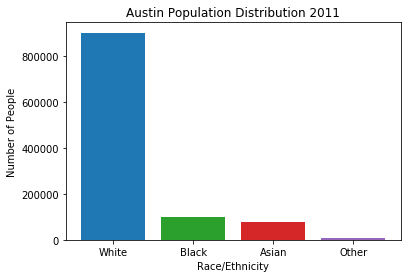

In [68]:
# Set data to plot
labels = ["White", "Black", "Asian", "Other"]
size_2011 = pop_year(2011)

# Set colors
colors = ["tab:blue", "tab:green", "tab:red", "tab:purple"]

# Create plot
plt.bar(labels, size_2011, align="center", color=colors, width=0.8)

# Set a Title and labels
plt.title("Austin Population Distribution 2011")
plt.xlabel("Race/Ethnicity")
plt.ylabel("Number of People")

In [69]:
# Define function to make a bar graph to show disribution for a given year

def bar_graph_year(year):
    # Set year to input
    year = year

    # Set data to plot
    labels = ["White", "Black", "Asian", "Other"]
    size = pop_year(year)

    # Set colors
    colors = ["tab:blue", "tab:orange", "tab:green", "tab:red", "tab:purple"]

    # Create plot
    plt.bar(labels, size, align="center", color=colors, width=0.8)

    # Set a Title and labels
    plt.title(f"Austin Population Distribution {year}")
    plt.xlabel("Race/Ethnicity")
    plt.ylabel("Number of People")

    return

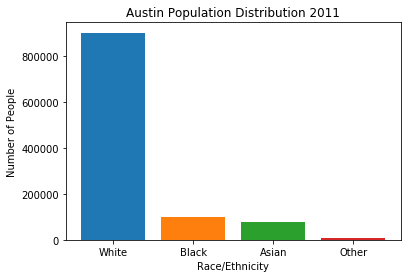

In [70]:
bar_graph_year(2011)

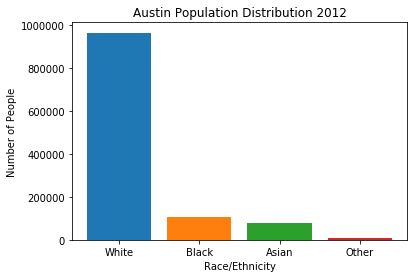

In [71]:
bar_graph_year(2012)

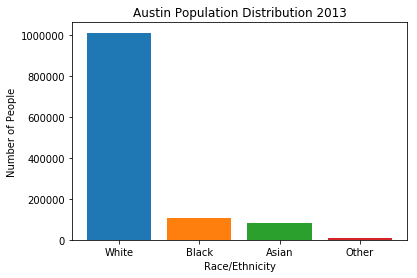

In [72]:
bar_graph_year(2013)

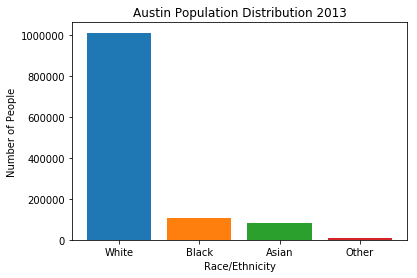

In [73]:
bar_graph_year(2013)

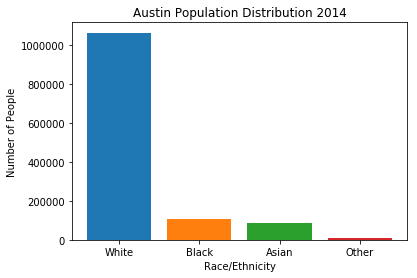

In [74]:
bar_graph_year(2014)

### Population Distribution 

In [ ]:
test = population_df[[population_df["Population_2011"].sum(), population_df["Population_2012"].sum()]]